In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
x = np.random.normal(0,1, 100)
y = np.random.normal(0.5,1.5, 100)
z = np.random.normal(100, 8, 100)

In [3]:
df = pd.DataFrame({'x':x,'y':y, 'z':z})
df.head()

,x,y,z
0,-0.356426,-1.229182,110.469984
1,-0.198646,0.099694,94.241390
2,0.561828,-0.872333,86.956392
3,0.634980,2.501432,115.906922
4,0.149976,1.591561,94.568999


In [4]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [5]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['x', 'y','z']
df_scaled.head()

,x,y,z
0,-0.417671,-1.011650,1.397967
1,-0.261327,-0.271991,-0.753001
2,0.492228,-0.813026,-1.718568
3,0.564715,1.064828,2.118589
4,0.084124,0.558389,-0.709579


### Clustering on Non-Scaled Data

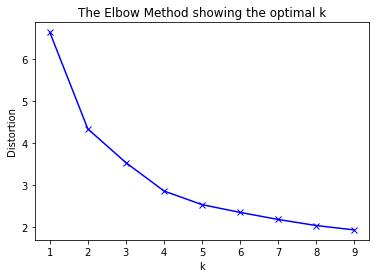

In [6]:
distortions = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Clustering on Scaled Data 

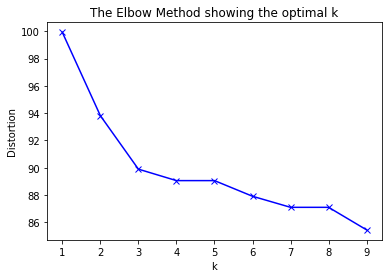

In [7]:
distortions = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_scaled)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

While performing clustering on non-scaled data, the centroids are highly influenced by the variable of higher scale.
When we scale the data, all the variables come on similar scale. Thus, when identiying the clusters, the centroids are not influcend by the higher scale variable. Also, the number of iterations required to reach the optimal number of clusters reduces. i.e. algorithm takes less time to converge.